In [1]:

import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem


In [19]:
with open("/imaging/hauk/users/fm02/final_dTtT/individual_ROIs/LDvsSD/scores.P" , 'rb') as f:
    scores_LD = pickle.load(f)


In [20]:
# # create times array
times = np.arange(-300,900,4)

colors = sns.color_palette(['#FFBE0B',
                            '#FB5607',
                            '#FF006E',
                            '#8338EC',
                            '#3A86FF',
                            '#1D437F',
                            '#1D437F'
                            ])


In [21]:
kk2 = ['visual', 'hand', 'hear', 'neutral','emotional']
kkROI = ['lATL', 'rATL', 'AG', 'PTC', 'IFG', 'PVA']

In [22]:
for task in scores_LD.keys():
    for roi in scores_LD[task].keys():
        scores_LD[task][roi] = np.array(scores_LD[task][roi])
        
# initialise average(scores) key
scores_LD['avg'] = [ [] for _ in range(len(scores_LD)) ]

In [23]:
scores_LD['avg']

lATL    []
rATL    []
AG      []
PTC     []
IFG     []
PVA     []
Name: avg, dtype: object

In [24]:
for i in range(0, 18):
    for roi in kkROI:
        scores_LD['avg'][roi].append(np.array([scores_LD['mlk'][roi][i],
                              scores_LD['frt'][roi][i],
                              scores_LD['odr'][roi][i]]).mean(axis=0))
        

In [25]:
np.array(scores_LD['avg']['lATL']).shape

(18, 300)

In [36]:
avg_LD = np.array(scores_LD['avg']['lATL'])

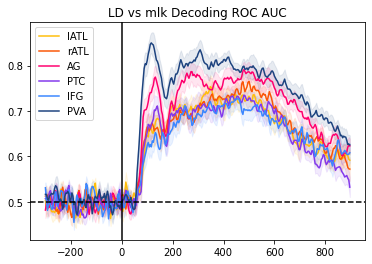

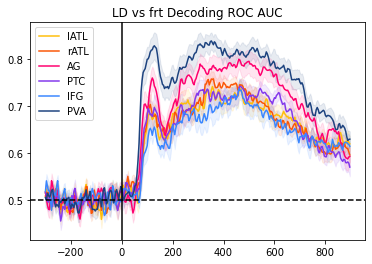

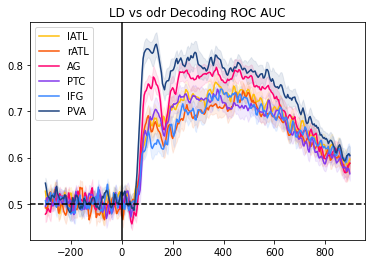

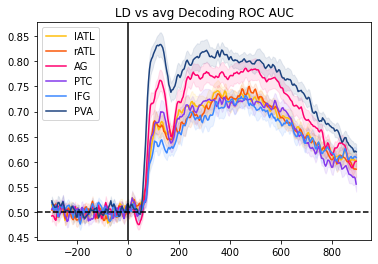

In [33]:
for task in scores_LD.keys():
    i = 0
    for roi in scores_LD[task].keys():
    # iter to select colours
    # average plot all ROIs in one plot
        # plot the average score across task (= scores['avg'], and across participants)    
        sns.lineplot(x=times, y=np.stack(scores_LD[task][roi]).mean(axis=0), color=colors[i], label=roi)
        # plot the standard error of the mean
        plt.fill_between(x=times, \
                          y1=(np.stack(scores_LD[task][roi]).mean(axis=0)) - sem(np.stack(scores_LD[task][roi]),0), \
                          y2=(np.stack(scores_LD[task][roi]).mean(axis=0)) + sem(np.stack(scores_LD[task][roi]),0), \
                          color=colors[i], alpha=.1)
        i += 1
    # plot some line that are useful for inspection
    plt.axvline(0, color='k');
    plt.title(f'LD vs {task} Decoding ROC AUC')
    plt.axhline(.5, color='k', linestyle='--');
    plt.legend();
    #plt.savefig(f'//cbsu/data/Imaging/hauk/users/fm02/final_dTtT/combined_ROIs/LDvsSD/Figures/{task}_LDvs_accuracy.png', format='png')
    plt.show();

In [26]:
with open("/imaging/hauk/users/fm02/final_dTtT/individual_ROIs/SDvsSD/scores.P" , 'rb') as f:
    scores_SD = pickle.load(f)


In [35]:
np.stack(scores_SD['lATL']).shape

(18, 300)

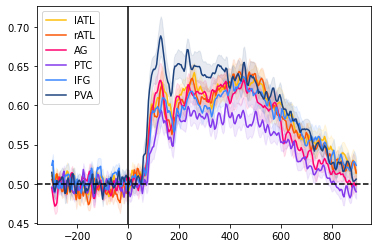

In [55]:
for roi in scores_SD.keys():
    scores_SD[roi] = np.array(scores_SD[roi])
        
# iter to select colours
i = 0

# average plot all ROIs in one plot
for roi in scores_SD.keys():
    # plot the average score across task (= scores['avg'], and across participants)    
    sns.lineplot(x=times, y=np.array(scores_SD[roi]).mean(axis=0), color=colors[i], label=roi)
# plot the standard error of the mean
    plt.fill_between(x=times, \
                  y1=(np.mean(np.array(scores_SD[roi]),0) - sem(np.vstack(scores_SD[roi]),0)), \
                  y2=(np.mean(np.array(scores_SD[roi]),0) + sem(np.vstack(scores_SD[roi]),0)), \
                  color=colors[i], alpha=.1)
    i+=1
# plot some line that are useful for inspection
plt.axvline(0, color='k');
#plt.title('multiclass SD Decoding ROC AUC')
plt.axhline(.5, color='k', linestyle='--');
plt.legend(loc='upper left');
#plt.savefig('//cbsu/data/Imaging/hauk/users/fm02/final_dTtT/individual_ROIs/SDvsSD/Figures/average_SDvsSD_accuracy.png', format='png')
plt.show();

In [37]:
avg_SD = np.stack(scores_SD['lATL'])

In [62]:
task_difference = avg_LD-avg_SD

In [48]:
from mne.stats import permutation_cluster_1samp_test
from scipy import stats

In [65]:
data = task_difference.reshape(18, 1, 300)
        # Compute threshold from t distribution (this is also the default)
threshold = stats.distributions.t.ppf(1 - 0.05, 18 - 1)
t_clust, clusters, p_values, H0 = permutation_cluster_1samp_test(
            data, n_jobs=1, threshold=threshold, adjacency=None,
            n_permutations="all")
temp_p_clust = np.ones((1,300))
for cl, p in zip(clusters, p_values):
    temp_p_clust[cl] = p
p_clust = temp_p_clust.T
        

stat_fun(H1): min=-2.471342 max=7.788096
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/131070 [00:00<?,       ?it/s]

In [66]:
print(f"Difference between LD and SD task at timepoints: \
              {times[np.where(p_clust < 0.05)[0]]}")

Difference between LD and SD task at timepoints:               [ 76  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140 144
 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212 216
 220 224 228 232 236 240 244 248 252 256 260 264 268 272 276 280 284 288
 292 296 300 304 308 312 316 320 324 328 332 336 340 344 348 352 356 360
 364 368 372 376 380 384 388 392 396 400 404 408 412 416 420 424 428 432
 436 440 444 448 452 456 460 464 468 472 476 480 484 488 492 496 500 504
 508 512 516 520 524 528 532 536 540 544 548 552 556 560 564 568 572 576
 580 584 588 592 596 600 604 608 612 616 620 624 628 632 636 640 644 648
 652 656 660 664 668 672 676 680 684 688 692 696 700 704 708 712 716 720
 724 728 732 736 740 744 748 752 756 760 764 768 772 776 780 784 788 792
 796 800 804 808 812 816 820 824 828 832 836 840 844 848 852 856 860 864
 868 872 876 880 884 888 892 896]


In [69]:
p_clust< 0.05

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

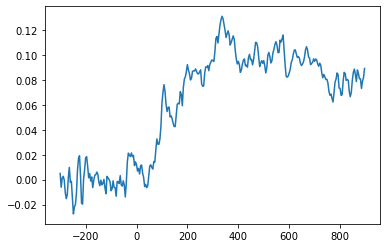

In [70]:
sns.lineplot(x=times, y=task_difference.mean(axis=0))
mask = p_clust < 0.05
mask = mask.reshape(300)
first_vals = np.argwhere((~mask[:-1] & mask[1:]))  # Look for False-True transitions
last_vals = np.argwhere((mask[:-1] & ~mask[1:])) + 1  # Look for True-False transitions
i+=1
for start, stop in zip(first_vals, last_vals):
    plt.axvspan(times[start], times[stop], alpha=0.5,
                label="Cluster based permutation p<.05",
                color="green")
# plt.legend();


In [73]:
last_vals

array([], shape=(0, 1), dtype=int64)